<center><h2>ToAI - Class C - Final Project:</h2></center>
<center><h1>Loan Default Prediction (part of SEB Big Data Challenge)</h1></center>

<img src="./assets/toai.png" style="width: 20rem; background: black;"/>
<img src="./assets/lfma-nariai-seb-bankas.jpg" style="width: 20rem"/>

## Table of contents:
0. [Prerquisites;](#prerequisites)
1. [Acquisition;](#acquisition)
2. [Exploration & Preprocessing;](#exploration-preprocessing)
3. [Analysis;](#analysis)
4. [Interpretation;](#interpretation)

## To do:
- Write-up after each code block;
- Feature engineering;
- Bonus: write function that creates waterfall chart for a given example;
- Implement the following models:
  - XGBoost model;
  - CatBoost model;
  - LightGBM model;
- Try creating an ensemble of succesful models;

<br>

## <a id="prerequisites">1. Prerequisites:</a>

In [1]:
# Packages:

from cornelia.imports import *
from cornelia.helpers import display_opts
from cornelia.extraction import read_feather, pickle_obj, unpickle_obj
from cornelia.preprocessing import match_cols, drop_cols, fill_NAs, one_hot_encode, category_encode, split_df, drop_NAs
from cornelia.visualization import print_missing_data, print_descriptive_stats, print_categories, plot_data, print_df, plot_distributions, pretty_print_dict
from cornelia.analysis import score_regr, score_class, feature_importance, confidence, similiar_features, score_with_cols_dropped, pdps

from sklearn.ensemble import RandomForestClassifier

import json
import itertools
import datetime

# Options:

%matplotlib inline
%load_ext autoreload
%autoreload 2

display_opts(decimal_numbers=2,
             max_rows=1000,
             max_cols=30)

## <a id="acquisition">1. Acquisition</a>

In [9]:
# Load raw data:

raw_train_df = read_feather(filename="raw_df_with_additional_features.f")
raw_test_df = read_feather(filename="test_df.f")

,id,y,amount_current_loan,term,credit_score,loan_purpose,yearly_income,home_ownership,bankruptcies,years_current_job,monthly_debt,years_credit_history,months_since_last_delinquent,open_accounts,credit_problems,credit_balance,max_open_credit
0,1000001,1,387574,short,None,debt_consolidation,nan,mortgage,1.00,10.00,20090.79,12,nan,10,1,242649,440440.00
1,1000002,0,72512,short,good,debt_consolidation,190798.00,rent,0.00,2.00,1460.91,6,nan,3,0,55062,129998.00
2,1000003,0,217404,short,good,debt_consolidation,1220313.00,mortgage,0.00,8.00,18293.39,10,nan,19,0,467514,513568.00
3,1000004,0,99999999,long,good,debt_consolidation,1435545.00,own,0.00,0.00,14312.70,18,27.00,7,0,157814,184140.00
4,1000005,1,215974,short,good,debt_consolidation,679250.00,rent,0.00,3.00,16464.45,14,53.00,6,0,216125,257840.00


,id,amount_current_loan,term,credit_score,loan_purpose,yearly_income,home_ownership,bankruptcies,years_current_job,monthly_debt,years_credit_history,months_since_last_delinquent,open_accounts,credit_problems,credit_balance,max_open_credit
0,1,438812,short,fair,debt_consolidation,1421010.00,mortgage,0.00,10.00,28595.95,21,nan,11,0,599545,826034
1,2,278344,long,None,debt_consolidation,723216.00,mortgage,0.00,0.00,15784.63,16,nan,9,0,271225,449504
2,3,155716,short,very_good,home_improvements,1956316.00,mortgage,0.00,8.00,21586.85,27,nan,12,0,28709,314468
3,4,442992,long,good,debt_consolidation,1339177.00,mortgage,0.00,10.00,23030.28,17,nan,7,0,766878,982234
4,5,412346,long,None,debt_consolidation,nan,mortgage,0.00,6.00,24058.94,10,68.00,11,0,524001,620950


## <a id="exploration-preprocessing">2. Exploration and Preprocessing:</a>

In [10]:
# Match columns:

raw_train_df = match_cols(df1=raw_train_df,
                          df2=raw_test_df,
                          omit=["y"])

No columns removed.


,id,amount_current_loan,term,credit_score,loan_purpose,yearly_income,home_ownership,bankruptcies,years_current_job,monthly_debt,years_credit_history,months_since_last_delinquent,open_accounts,credit_problems,credit_balance,max_open_credit,y
0,1000001,387574,short,None,debt_consolidation,nan,mortgage,1.00,10.00,20090.79,12,nan,10,1,242649,440440.00,1
1,1000002,72512,short,good,debt_consolidation,190798.00,rent,0.00,2.00,1460.91,6,nan,3,0,55062,129998.00,0
2,1000003,217404,short,good,debt_consolidation,1220313.00,mortgage,0.00,8.00,18293.39,10,nan,19,0,467514,513568.00,0
3,1000004,99999999,long,good,debt_consolidation,1435545.00,own,0.00,0.00,14312.70,18,27.00,7,0,157814,184140.00,0
4,1000005,215974,short,good,debt_consolidation,679250.00,rent,0.00,3.00,16464.45,14,53.00,6,0,216125,257840.00,1


In [11]:
# Observe missing data:

print_missing_data(dfs=[raw_train_df, raw_test_df],
                   labels=["train", "test"])

,Missing values in train (%),Missing values in test (%)
feature_name,,
id,0.00,0.00
amount_current_loan,0.00,0.00
term,0.00,0.00
credit_score,22.93,23.88
loan_purpose,0.00,0.00
yearly_income,18.89,19.47
home_ownership,0.00,0.00
bankruptcies,0.18,0.17
years_current_job,4.18,3.53


In [12]:
# Descriptive stats:

print_descriptive_stats(dfs=[raw_train_df, raw_test_df],
                        labels=["train", "test"])

,count,mean,std,min,25%,50%,75%,max
amount_current_loan (test),10000.00,11794868.60,31829206.38,21472.00,178238.50,310695.00,523094.00,99999999.00
amount_current_loan (train),9000000.00,13038047.72,33267502.46,10802.00,180268.00,316360.00,536184.00,99999999.00
bankruptcies (test),9983.00,0.12,0.35,0.00,0.00,0.00,0.00,5.00
bankruptcies (train),8983451.00,0.12,0.35,0.00,0.00,0.00,0.00,7.00
credit_balance (test),10000.00,292058.10,348668.55,0.00,111824.50,206824.50,362615.00,7225415.00
credit_balance (train),9000000.00,297664.97,376019.74,0.00,113278.00,210786.00,370804.00,32878968.00
credit_problems (test),10000.00,0.17,0.47,0.00,0.00,0.00,0.00,9.00
credit_problems (train),9000000.00,0.17,0.49,0.00,0.00,0.00,0.00,15.00
id (test),10000.00,5000.50,2886.90,1.00,2500.75,5000.50,7500.25,10000.00
id (train),9000000.00,5500000.50,2598076.36,1000001.00,3250000.75,5500000.50,7750000.25,10000000.00


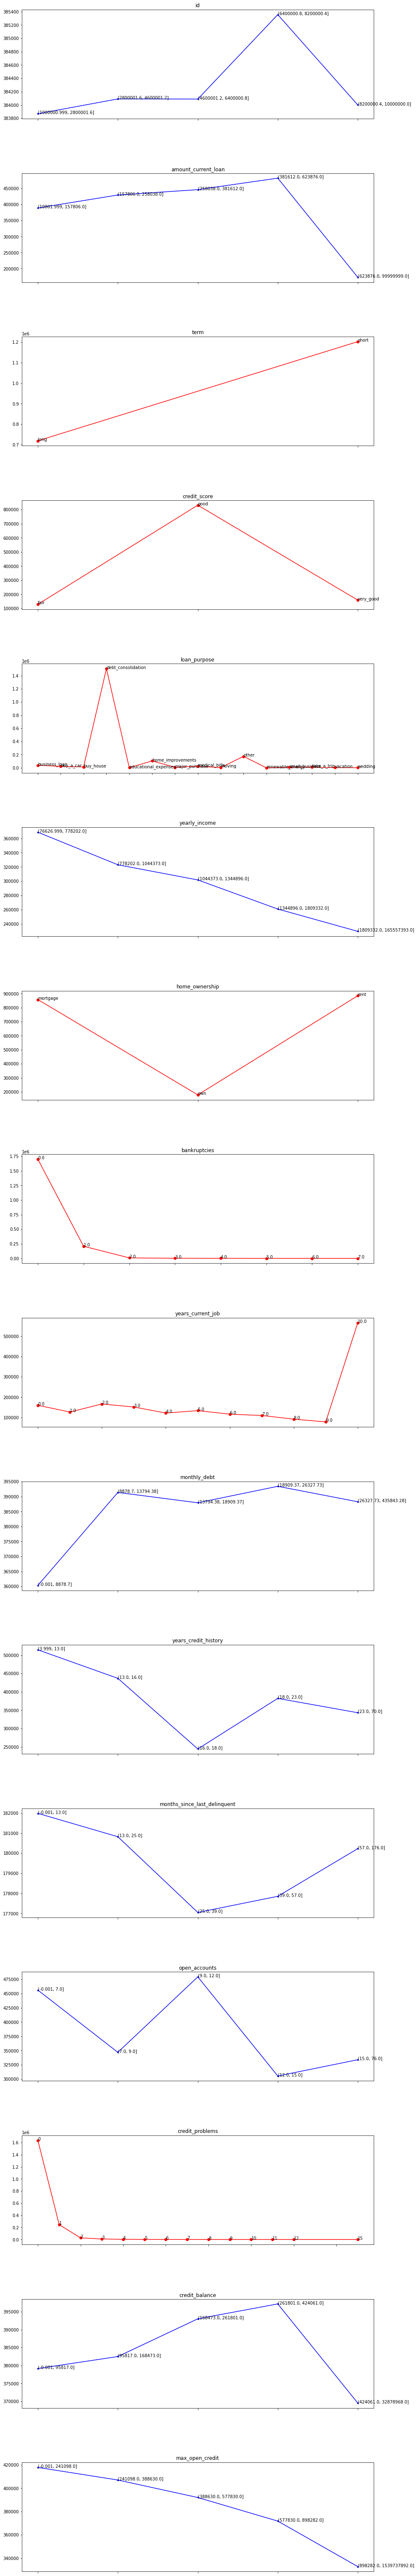

In [14]:
# Distributions

plot_distributions(raw_train_df, "y", n_bins=5)

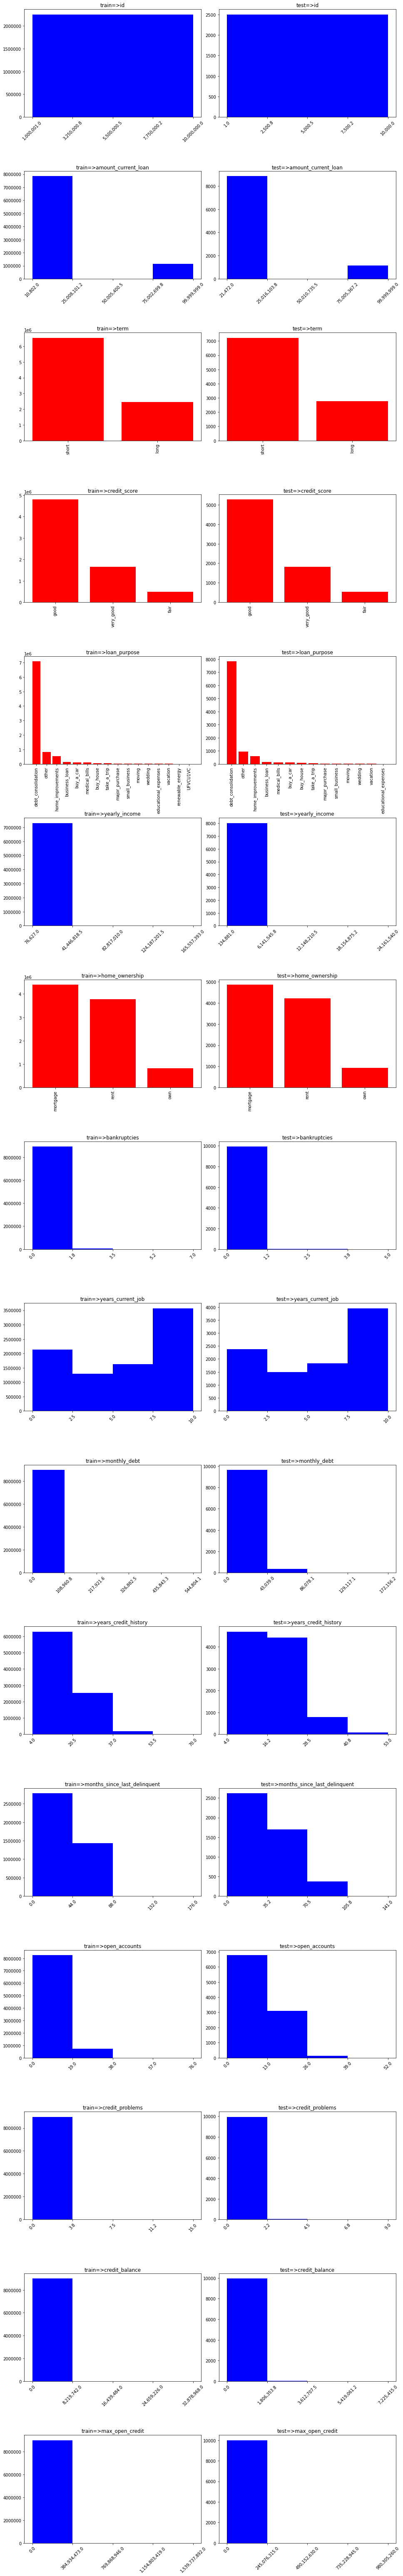

In [6]:
# Print histograms for each feature:
    
plot_data(dfs=[raw_train_df, raw_test_df],
          labels=["train", "test"],
          bench=1,
          n_bins=4)

In [13]:
# Drop a single row with an obfuscated feature:

raw_train_df = raw_train_df[raw_train_df["loan_purpose"] != "UFVCU1VC"]

In [14]:
# Backup data:

pickle_obj([raw_train_df, raw_test_df], "train_test_dfs")

Object saved @ ./tmp/train_test_dfs.pkl


## <a id="analysis">3. Analysis & Interpretation:</a>

In [41]:
config_1 = {"sample": [0.2, 0.5],
            "nas": {"mode": "fill",
                    "params": {"num_method": ["median", "mean", "mode"],
                               "cat_method": ["mode", None],
                               "was_missing": [True, False]}},
            "drop_cols": [["a", "b", "c"],
                          ["a", "b"]],
            "categoricals": {"mode": "category_encode"},
            "split": [0.5, 0.7, 0.9],
            "prediction": {"model": "rf",
                           "params": {"n_estimators": [50, 75, 100, 150],
                                      "max_samples": [50_000, 100_000, 250_000],
                                      "max_features": [0.7, 0.8, 0.9],
                                      "min_samples_leaf": [1, 3, 5]}}}

config_2 = {"sample": [0.2, 0.5],
            "nas": {"mode": "drop",
                    "params": {"axis": [0, 1]}},
            "drop_cols": [["a", "b", "c"],
                          ["a", "b"]],
            "categoricals": {"mode": "one_hot_encode",
                             "params": {"card_threshold": [15]}},
            "split": [0.5, 0.7, 0.9],
            "prediction": {"model": "rf",
                           "params": {"n_estimators": [50, 75, 100, 150],
                                      "max_samples": [50_000, 100_000, 250_000],
                                      "max_features": [0.7, 0.8, 0.9],
                                      "min_samples_leaf": [1, 3, 5]}
                           }
            }


class Pipeline:
    def __init__(self, config, train_df, test_df, target, backup=False):
        self.config = config
        self.raw_train_df = train_df
        self.raw_test_df = test_df
        self.target = target
        self.backup = backup
        self.param_sets = list()
        self.labels = list()
        self.validate_input()
        self.last_input = list()
        self.last_m = None 
        
        
    def validate_input(self):
        self.params = [self.config["sample"],
                       self.config["nas"]["mode"],
                       self.config["nas"]["params"].get("num_method", "median"),
                       self.config["nas"]["params"].get("cat_method", "mode"),
                       self.config["nas"]["params"].get("was_missing", True),
                       self.config["nas"]["params"].get("axis", 0),
                       self.config.get("drop_cols", None),
                       self.config["categoricals"]["mode"],
                       self.config["categoricals"].get("params", dict()).get("card_thresh", 15),
                       self.config["split"],
                       self.config["prediction"]["model"],
                       self.config["prediction"]["params"].get("n_estimators", 20),
                       self.config["prediction"]["params"].get("max_samples", None),
                       self.config["prediction"]["params"].get("max_features", 'auto'),
                       self.config["prediction"]["params"].get("min_samples_leaf", 1)]

        self.labels = ["sample", "nas_mode", "nas_fill_num_method", "nas_fill_cat_method",
                       "nas_fill_was_missing", "nas_drop_axis", "drop_cols", "categoricals_mode",
                       "categoricals_one_hot_encode_card_thresh", "split",
                       "prediction_model", "prediction_rf_n_estimators", "prediction_rf_max_samples",
                       "prediction_rf_max_features", "prediction_rf_min_samples_leaf"]
        
        self.params = [[i] if not isinstance(i, list) else i for i in self.params]
        self.param_sets = list(itertools.product(*self.params))
        
    def feature_importance(self):
        train_X, train_y, valid_X, valid_y = self.last_input
        
        fi_cols_to_drop = feature_importance(m=self.last_m,
                                             df=train_X,
                                             print_rows=15,
                                             to_keep_threshold=0.01)
        return fi_cols_to_drop
    
    def colinear_features(self):
        train_X, train_y, valid_X, valid_y = self.last_input
        similiar_features(train_X)

    
    def scores(self):
        archive = pd.read_csv("./tmp/.scores",
                              sep=";")
        
        print_df(archive, -1)
        
    def run(self):
        for i, ps in enumerate(self.param_sets):
            print(f"\nSub-iteration {i + 1}/{len(self.param_sets)}:")
            
            # Sample data:
            print("\t - Sample:")
            print(f"\t\t # {int(ps[0] * 100)}% of the training/testing data.")
            train_df = self.raw_train_df.copy().sample(frac=ps[0])
            test_df = self.raw_test_df.copy().sample(frac=ps[0])
                        
            # NANs:
            print("\t - NaNs:")
            if self.config["nas"]["mode"] == "fill":
                print("\t\t # mode: fill;")
                print(f"\t\t # num_method: {ps[2]};")
                print(f"\t\t # cat_method: {ps[3]};")
                print(f"\t\t # was_missing: {ps[4]};")
                
                train_df, test_df = fill_NAs(dfs=[train_df, test_df],
                                             omit=[self.target],
                                             num_method=ps[2],
                                             cat_method=ps[3],
                                             was_missing=ps[4],
                                             verbose=False)
            elif self.config["nas"]["mode"] == "drop":
                print("\t\t # mode: drop;")
                print(f"\t\t # axis: {ps[5]};")

                train_df, test_df = drop_NAs(dfs=[train_df, test_df],
                                                  labels=["train_df", "test_df"],
                                                  axis=ps[5],
                                                  verbose=False)
            # Categorical features:
            print("\t - Categoricals:")
            if self.config["categoricals"]["mode"] == "category_encode":
                print("\t\t # mode: categorical_encoding;")
                [train_df, test_df], _ = category_encode(dfs=[train_df, test_df],
                                                         verbose=False)
            elif self.config["categoricals"]["mode"] == "one_hot_encode":
                print("\t\t # mode: one_hot_encode;")
                print(f"\t\t # cardinality threshold: {ps[8]};")
                train_df, test_df = one_hot_encode(dfs=[train_df, test_df],
                                                        card_thresh=ps[7],
                                                        verbose=False)
            # Drop columns:
            if ps[6]:
                print("\t - Drop columns:")
                for c in ps[6]:
                    print(f"\t\t # {c};")
                train_df, test_df = drop_cols(dfs=[train_df, test_df],
                                                   cols=ps[6],
                                                   verbose=False)
            # Split data:
            print("\t - Train/validation split:")
            print(f"\t\t # {int(ps[9] * 100)}/{int((1 - ps[9]) * 100)}")
            train_X, train_y, valid_X, valid_y = split_df(df=train_df,
                                                          target=self.target,
                                                          train_p=ps[9],
                                                          verbose=False)
            # Train model:
            print("\t - Prediction:")
            if self.config["prediction"]["model"] == "rf":
                print(f"\t\t # model - RandomForest;")
                print(f"\t\t # n_estimators - {ps[11]};")
                print(f"\t\t # max_samples - {ps[12]};")
                print(f"\t\t # max_features - {ps[13]};")
                print(f"\t\t # min_samples_leaf - {ps[14]};")

                m = RandomForestClassifier(n_estimators=ps[11],
                                           max_samples=ps[12],
                                           max_features=ps[13],
                                           min_samples_leaf=ps[14],
                                           n_jobs=-1)
                m.fit(train_X, train_y)

            # Backup model:
            if self.backup:
                timestamp = datetime.datetime.now().strftime("%Y%m%d%H%M")
                pickle_obj(m, f"model_{timestamp}")
            
            # Score model:
            print("\t - Score:")
            score_labels, scores = score_class(m, train_X, train_y, valid_X, valid_y)
            
            # Archive the result:
            fp = "./tmp/.scores"
            if not os.path.isfile(fp):
                with open("./tmp/.scores", "w+") as fh:
                    fh.write(";".join(self.labels + score_labels) + os.linesep)
                    
            with open(fp, "a") as fh:
                fh.write(";".join([str(i) if not isinstance(i, list) else ",".join([str(j) for j in i]) for i in ps] + [str(s) for s in scores]) + os.linesep)
                
            self.last_input = [train_X, test_X, valid_X, valid_y]
            self.last_m = m

In [3]:
# Unbackup data:

raw_train_df, raw_test_df = unpickle_obj("train_test_dfs")

### 3.1. Iteration #1 - test dropping NaNs on each axis:

In [42]:
config_1 = {"sample": 0.2,
            "nas": {"mode": "drop",
                    "params": {"axis": [0, 1]}},
            "categoricals": {"mode": "category_encode"},
            "split": 0.5,
            "prediction": {"model": "rf",
                           "params": {"n_estimators": 40}
                           }
           }

p = Pipeline(config=config_1, 
             train_df=raw_train_df,
             test_df=raw_test_df,
             target="y")

p.run()


Sub-iteration 1/2:
	 - Sample:
		 # 20% of the training/testing data.
	 - NaNs:
		 # mode: drop;
		 # axis: 0;
	 - Categoricals:
		 # mode: categorical_encoding;
	 - Train/validation split:
		 # 50/50
	 - Prediction:
		 # model - RandomForest;
		 # n_estimators - 40;
		 # max_samples - None;
		 # max_features - auto;
		 # min_samples_leaf - 1;
	 - Score:


,Train,Valid
Jacquard Score (%),1.00,0.84
Precision (What proportion of positive identifications was actually correct?),1.00,0.61
Recall (What proportion of actual positives was identified correctly?),1.00,0.80
F1,1.00,0.69
ROC AUC,1.00,0.74



Sub-iteration 2/2:
	 - Sample:
		 # 20% of the training/testing data.
	 - NaNs:
		 # mode: drop;
		 # axis: 1;
	 - Categoricals:
		 # mode: categorical_encoding;
	 - Train/validation split:
		 # 50/50
	 - Prediction:
		 # model - RandomForest;
		 # n_estimators - 40;
		 # max_samples - None;
		 # max_features - auto;
		 # min_samples_leaf - 1;
	 - Score:


,Train,Valid
Jacquard Score (%),1.00,0.78
Precision (What proportion of positive identifications was actually correct?),1.00,0.42
Recall (What proportion of actual positives was identified correctly?),1.00,0.67
F1,1.00,0.51
ROC AUC,1.00,0.65


### 3.2. Iteration #2 - test filling NaNs with different parameters:

In [44]:
config_2 = {"sample": 0.2,
            "nas": {"mode": "fill",
                    "params": {"num_method": ["median", "mean", None],
                               "cat_method": ["mode", None],
                               "was_missing": [True, False]}},
            "categoricals": {"mode": "category_encode"},
            "split": 0.5,
            "prediction": {"model": "rf",
                           "params": {"n_estimators": 40}
                           }
           }

p = Pipeline(config=config_2, 
             train_df=raw_train_df,
             test_df=raw_test_df,
             target="y")

p.run()


Sub-iteration 1/12:
	 - Sample:
		 # 20% of the training/testing data.
	 - NaNs:
		 # mode: fill;
		 # num_method: median;
		 # cat_method: mode;
		 # was_missing: True;
	 - Categoricals:
		 # mode: categorical_encoding;
	 - Train/validation split:
		 # 50/50
	 - Prediction:
		 # model - RandomForest;
		 # n_estimators - 40;
		 # max_samples - None;
		 # max_features - auto;
		 # min_samples_leaf - 1;
	 - Score:


,Train,Valid
Jacquard Score (%),1.00,0.83
Precision (What proportion of positive identifications was actually correct?),1.00,0.88
Recall (What proportion of actual positives was identified correctly?),1.00,0.84
F1,1.00,0.86
ROC AUC,1.00,0.79



Sub-iteration 2/12:
	 - Sample:
		 # 20% of the training/testing data.
	 - NaNs:
		 # mode: fill;
		 # num_method: median;
		 # cat_method: mode;
		 # was_missing: False;
	 - Categoricals:
		 # mode: categorical_encoding;
	 - Train/validation split:
		 # 50/50
	 - Prediction:
		 # model - RandomForest;
		 # n_estimators - 40;
		 # max_samples - None;
		 # max_features - auto;
		 # min_samples_leaf - 1;
	 - Score:


,Train,Valid
Jacquard Score (%),1.00,0.79
Precision (What proportion of positive identifications was actually correct?),1.00,0.61
Recall (What proportion of actual positives was identified correctly?),1.00,0.75
F1,1.00,0.67
ROC AUC,1.00,0.74



Sub-iteration 3/12:
	 - Sample:
		 # 20% of the training/testing data.
	 - NaNs:
		 # mode: fill;
		 # num_method: median;
		 # cat_method: None;
		 # was_missing: True;
	 - Categoricals:
		 # mode: categorical_encoding;
	 - Train/validation split:
		 # 50/50
	 - Prediction:
		 # model - RandomForest;
		 # n_estimators - 40;
		 # max_samples - None;
		 # max_features - auto;
		 # min_samples_leaf - 1;
	 - Score:


,Train,Valid
Jacquard Score (%),1.00,0.83
Precision (What proportion of positive identifications was actually correct?),1.00,0.88
Recall (What proportion of actual positives was identified correctly?),1.00,0.84
F1,1.00,0.86
ROC AUC,1.00,0.79



Sub-iteration 4/12:
	 - Sample:
		 # 20% of the training/testing data.
	 - NaNs:
		 # mode: fill;
		 # num_method: median;
		 # cat_method: None;
		 # was_missing: False;
	 - Categoricals:
		 # mode: categorical_encoding;
	 - Train/validation split:
		 # 50/50
	 - Prediction:
		 # model - RandomForest;
		 # n_estimators - 40;
		 # max_samples - None;
		 # max_features - auto;
		 # min_samples_leaf - 1;
	 - Score:


,Train,Valid
Jacquard Score (%),1.00,0.83
Precision (What proportion of positive identifications was actually correct?),1.00,0.86
Recall (What proportion of actual positives was identified correctly?),1.00,0.84
F1,1.00,0.85
ROC AUC,1.00,0.80



Sub-iteration 5/12:
	 - Sample:
		 # 20% of the training/testing data.
	 - NaNs:
		 # mode: fill;
		 # num_method: mean;
		 # cat_method: mode;
		 # was_missing: True;
	 - Categoricals:
		 # mode: categorical_encoding;
	 - Train/validation split:
		 # 50/50
	 - Prediction:
		 # model - RandomForest;
		 # n_estimators - 40;
		 # max_samples - None;
		 # max_features - auto;
		 # min_samples_leaf - 1;
	 - Score:


,Train,Valid
Jacquard Score (%),1.00,0.83
Precision (What proportion of positive identifications was actually correct?),1.00,0.88
Recall (What proportion of actual positives was identified correctly?),1.00,0.84
F1,1.00,0.86
ROC AUC,1.00,0.79



Sub-iteration 6/12:
	 - Sample:
		 # 20% of the training/testing data.
	 - NaNs:
		 # mode: fill;
		 # num_method: mean;
		 # cat_method: mode;
		 # was_missing: False;
	 - Categoricals:
		 # mode: categorical_encoding;
	 - Train/validation split:
		 # 50/50
	 - Prediction:
		 # model - RandomForest;
		 # n_estimators - 40;
		 # max_samples - None;
		 # max_features - auto;
		 # min_samples_leaf - 1;
	 - Score:


,Train,Valid
Jacquard Score (%),1.00,0.79
Precision (What proportion of positive identifications was actually correct?),1.00,0.61
Recall (What proportion of actual positives was identified correctly?),1.00,0.75
F1,1.00,0.67
ROC AUC,1.00,0.74



Sub-iteration 7/12:
	 - Sample:
		 # 20% of the training/testing data.
	 - NaNs:
		 # mode: fill;
		 # num_method: mean;
		 # cat_method: None;
		 # was_missing: True;
	 - Categoricals:
		 # mode: categorical_encoding;
	 - Train/validation split:
		 # 50/50
	 - Prediction:
		 # model - RandomForest;
		 # n_estimators - 40;
		 # max_samples - None;
		 # max_features - auto;
		 # min_samples_leaf - 1;
	 - Score:


,Train,Valid
Jacquard Score (%),1.00,0.83
Precision (What proportion of positive identifications was actually correct?),1.00,0.87
Recall (What proportion of actual positives was identified correctly?),1.00,0.84
F1,1.00,0.86
ROC AUC,1.00,0.79



Sub-iteration 8/12:
	 - Sample:
		 # 20% of the training/testing data.
	 - NaNs:
		 # mode: fill;
		 # num_method: mean;
		 # cat_method: None;
		 # was_missing: False;
	 - Categoricals:
		 # mode: categorical_encoding;
	 - Train/validation split:
		 # 50/50
	 - Prediction:
		 # model - RandomForest;
		 # n_estimators - 40;
		 # max_samples - None;
		 # max_features - auto;
		 # min_samples_leaf - 1;
	 - Score:


,Train,Valid
Jacquard Score (%),1.00,0.83
Precision (What proportion of positive identifications was actually correct?),1.00,0.85
Recall (What proportion of actual positives was identified correctly?),1.00,0.84
F1,1.00,0.85
ROC AUC,1.00,0.80



Sub-iteration 9/12:
	 - Sample:
		 # 20% of the training/testing data.
	 - NaNs:
		 # mode: fill;
		 # num_method: None;
		 # cat_method: mode;
		 # was_missing: True;
	 - Categoricals:
		 # mode: categorical_encoding;
	 - Train/validation split:
		 # 50/50
	 - Prediction:
		 # model - RandomForest;
		 # n_estimators - 40;
		 # max_samples - None;
		 # max_features - auto;
		 # min_samples_leaf - 1;
	 - Score:


,Train,Valid
Jacquard Score (%),1.00,0.83
Precision (What proportion of positive identifications was actually correct?),1.00,0.88
Recall (What proportion of actual positives was identified correctly?),1.00,0.84
F1,1.00,0.86
ROC AUC,1.00,0.79



Sub-iteration 10/12:
	 - Sample:
		 # 20% of the training/testing data.
	 - NaNs:
		 # mode: fill;
		 # num_method: None;
		 # cat_method: mode;
		 # was_missing: False;
	 - Categoricals:
		 # mode: categorical_encoding;
	 - Train/validation split:
		 # 50/50
	 - Prediction:
		 # model - RandomForest;
		 # n_estimators - 40;
		 # max_samples - None;
		 # max_features - auto;
		 # min_samples_leaf - 1;
	 - Score:


,Train,Valid
Jacquard Score (%),1.00,0.80
Precision (What proportion of positive identifications was actually correct?),1.00,0.61
Recall (What proportion of actual positives was identified correctly?),1.00,0.75
F1,1.00,0.67
ROC AUC,1.00,0.74



Sub-iteration 11/12:
	 - Sample:
		 # 20% of the training/testing data.
	 - NaNs:
		 # mode: fill;
		 # num_method: None;
		 # cat_method: None;
		 # was_missing: True;
	 - Categoricals:
		 # mode: categorical_encoding;
	 - Train/validation split:
		 # 50/50
	 - Prediction:
		 # model - RandomForest;
		 # n_estimators - 40;
		 # max_samples - None;
		 # max_features - auto;
		 # min_samples_leaf - 1;
	 - Score:


,Train,Valid
Jacquard Score (%),1.00,0.83
Precision (What proportion of positive identifications was actually correct?),1.00,0.88
Recall (What proportion of actual positives was identified correctly?),1.00,0.84
F1,1.00,0.86
ROC AUC,1.00,0.79



Sub-iteration 12/12:
	 - Sample:
		 # 20% of the training/testing data.
	 - NaNs:
		 # mode: fill;
		 # num_method: None;
		 # cat_method: None;
		 # was_missing: False;
	 - Categoricals:
		 # mode: categorical_encoding;
	 - Train/validation split:
		 # 50/50
	 - Prediction:
		 # model - RandomForest;
		 # n_estimators - 40;
		 # max_samples - None;
		 # max_features - auto;
		 # min_samples_leaf - 1;
	 - Score:


,Train,Valid
Jacquard Score (%),1.00,0.83
Precision (What proportion of positive identifications was actually correct?),1.00,0.86
Recall (What proportion of actual positives was identified correctly?),1.00,0.84
F1,1.00,0.85
ROC AUC,1.00,0.80


In [46]:
# Print score history:

p.scores()

,sample,nas_mode,nas_fill_num_method,nas_fill_cat_method,nas_fill_was_missing,nas_drop_axis,drop_cols,categoricals_mode,categoricals_one_hot_encode_card_thresh,split,prediction_model,prediction_rf_n_estimators,prediction_rf_max_samples,prediction_rf_max_features,prediction_rf_min_samples_leaf,Jacquard Score (%),Precision (What proportion of positive identifications was actually correct?),Recall (What proportion of actual positives was identified correctly?),F1,ROC AUC
0,0.20,drop,median,mode,True,0,None,category_encode,15,0.50,rf,40,None,auto,1,0.84,0.62,0.80,0.70,0.74
1,0.20,drop,median,mode,True,1,None,category_encode,15,0.50,rf,40,None,auto,1,0.78,0.42,0.67,0.51,0.65
2,0.20,drop,median,mode,True,0,None,category_encode,15,0.50,rf,40,None,auto,1,0.84,0.61,0.80,0.69,0.74
3,0.20,drop,median,mode,True,1,None,category_encode,15,0.50,rf,40,None,auto,1,0.78,0.42,0.67,0.51,0.65
4,0.20,fill,median,mode,True,0,None,category_encode,15,0.50,rf,40,None,auto,1,0.83,0.88,0.84,0.86,0.79
5,0.20,fill,median,mode,False,0,None,category_encode,15,0.50,rf,40,None,auto,1,0.79,0.61,0.75,0.67,0.74
6,0.20,fill,median,None,True,0,None,category_encode,15,0.50,rf,40,None,auto,1,0.83,0.88,0.84,0.86,0.79
7,0.20,fill,median,None,False,0,None,category_encode,15,0.50,rf,40,None,auto,1,0.83,0.86,0.84,0.85,0.80
8,0.20,fill,mean,mode,True,0,None,category_encode,15,0.50,rf,40,None,auto,1,0.83,0.88,0.84,0.86,0.79
9,0.20,fill,mean,mode,False,0,None,category_encode,15,0.50,rf,40,None,auto,1,0.79,0.61,0.75,0.67,0.74


### 3.3. Iteration #3 - testing OneHotEncoding & feature importance:

In [ ]:
config_3 = {"sample": 0.2,
            "nas": {"mode": "fill",
                    "params": {"num_method": "median",
                               "cat_method": "mode",
                               "was_missing": True}},
            "categoricals": {"mode": "one_hot_encode",
                             "params": {"card_threshold": 15}},
            "split": 0.5,
            "prediction": {"model": "rf",
                           "params": {"n_estimators": 40}
                           }
           }

p = Pipeline(config=config_3, 
             train_df=raw_train_df,
             test_df=raw_test_df,
             target="y",
             backup=True)

p.run()

In [9]:
# Feature importance:

fi_cols_to_drop = p.feature_importance()

# Backup feature importance result:

pickle_obj(fi_cols_to_drop, "iteration_3_fi_cols_to_drop")

,feature_name,importance
0,amount_current_loan,0.12
1,yearly_income,0.09
2,max_open_credit,0.09
3,monthly_debt,0.09
4,credit_balance,0.09
5,id,0.09
6,credit_score=>was_missing,0.07
7,years_credit_history,0.06
8,open_accounts,0.06
9,months_since_last_delinquent,0.05


Object saved @ ./tmp/model_3_unimportant_features_1.pkl


### 3.4. Iteration #4 - dropping unimportant features + testing colinear features:

In [ ]:
fi_cols_to_drop = unpickle_obj("fi_cols_to_drop")

config_4 = {"sample": 0.2,
            "nas": {"mode": "fill",
                    "params": {"num_method": "median",
                               "cat_method": "mode",
                               "was_missing": True}},
            "categoricals": {"mode": "category_encode"},
            "drop_cols": fi_cols_to_drop,
            "split": 0.5,
            "prediction": {"model": "rf",
                           "params": {"n_estimators": 40}
                           }
           }

p = Pipeline(config=config_2, 
             train_df=raw_train_df,
             test_df=raw_test_df,
             target="y")

p.run()

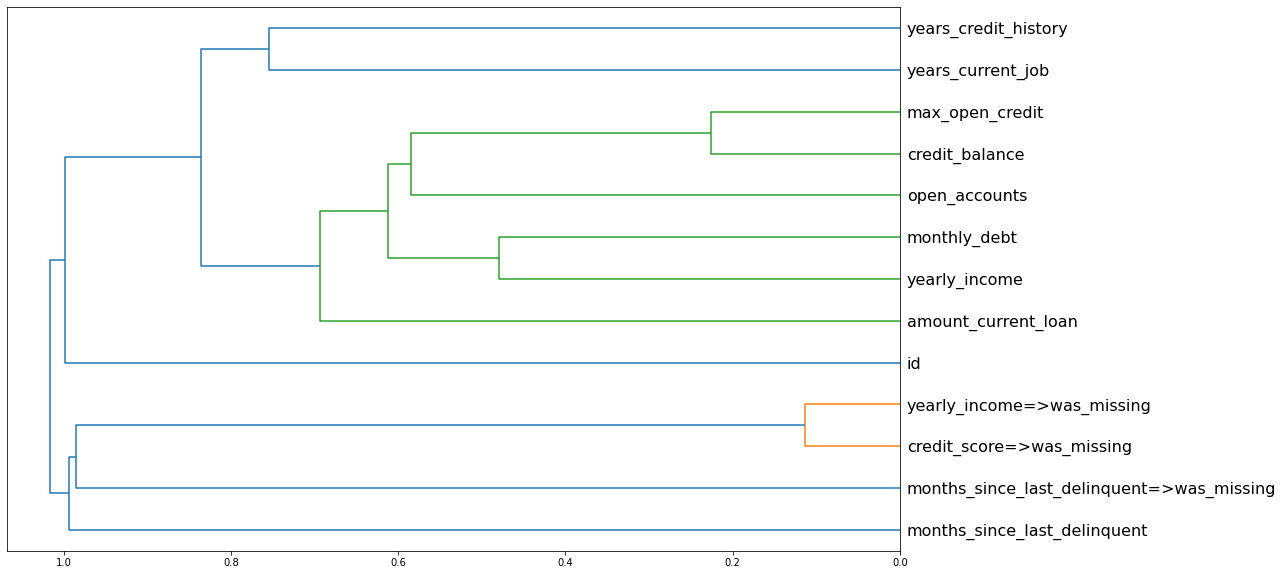

In [12]:
# Find colinear features:

p.colinear_features()

In [59]:
# Check if dropping any of colinear feature will impact score:

potentially_colinear_features = [["yearly_income=>was_missing", "credit_score=>was_missing"],
                                 ["max_open_credit", "credit_balance"],
                                 ["monthly_debt", "yearly_income"]]

# Backup feature importance result:

pickle_obj(potentially_colinear_features, "iteration_4_potentially_colinear_features")

Object saved @ ./tmp/model_4_potentially_colinear_features.pkl


### 3.5. Iteration #5 - test dropping different combinations of colinear features:

In [67]:
fi_cols_to_drop = unpickle_obj("fi_cols_to_drop")
potentially_colinear_features = unpickle_obj("model_4_potentially_colinear_features")
feature_pairs_drop = list(itertools.product(*[t + [None] for t in potentially_colinear_features]))


config_5 = {"sample": 0.2,
            "nas": {"mode": "fill",
                    "params": {"num_method": "median",
                               "cat_method": "mode",
                               "was_missing": True}},
            "categoricals": {"mode": "category_encode"},
            "drop_cols": fi_cols_to_drop + feature_pairs_drop,
            "split": 0.5,
            "prediction": {"model": "rf",
                           "params": {"n_estimators": 40}
                           }
           }

p = Pipeline(config=config_5, 
             train_df=raw_train_df,
             test_df=raw_test_df,
             target="y")

p.run()

Testing the ('yearly_income=>was_missing', 'max_open_credit', 'monthly_debt') sequence, will try to drop and test the result:
Done.
Done.
Done.
900000 rows shuffled in df No.1.
Shapes of the outputs: (450000, 10) (450000,) (450000, 10) (450000,)
Object saved @ ./tmp/input_data_model_5_0.pkl
Object saved @ ./tmp/model_5_0.pkl


,Train,Valid
Jacquard Score (%),0.83,0.83
True Positives (% of all positives),0.99,0.97
True Negatives (% of all negatives),0.82,0.82
False Positives (% of all positives),0.01,0.03
False Negatives (% of all negatives),0.18,0.18
Precision (What proportion of positive identifications was actually correct?),0.99,0.97
Recall (What proportion of actual positives was identified correctly?),0.85,0.84


Testing the ('yearly_income=>was_missing', 'max_open_credit', 'yearly_income') sequence, will try to drop and test the result:
Done.
Done.
Done.
900000 rows shuffled in df No.1.
Shapes of the outputs: (450000, 10) (450000,) (450000, 10) (450000,)
Object saved @ ./tmp/input_data_model_5_1.pkl
Object saved @ ./tmp/model_5_1.pkl


,Train,Valid
Jacquard Score (%),0.81,0.79
True Positives (% of all positives),0.86,0.49
True Negatives (% of all negatives),0.81,0.79
False Positives (% of all positives),0.14,0.51
False Negatives (% of all negatives),0.19,0.21
Precision (What proportion of positive identifications was actually correct?),0.86,0.49
Recall (What proportion of actual positives was identified correctly?),0.82,0.70


Testing the ('yearly_income=>was_missing', 'max_open_credit', 'None') sequence, will try to drop and test the result:
Done.
Done.
Done.
900000 rows shuffled in df No.1.
Shapes of the outputs: (450000, 11) (450000,) (450000, 11) (450000,)
Object saved @ ./tmp/input_data_model_5_2.pkl
Object saved @ ./tmp/model_5_2.pkl


,Train,Valid
Jacquard Score (%),0.83,0.83
True Positives (% of all positives),0.99,0.97
True Negatives (% of all negatives),0.82,0.82
False Positives (% of all positives),0.01,0.03
False Negatives (% of all negatives),0.18,0.18
Precision (What proportion of positive identifications was actually correct?),0.99,0.97
Recall (What proportion of actual positives was identified correctly?),0.85,0.84


Testing the ('yearly_income=>was_missing', 'credit_balance', 'monthly_debt') sequence, will try to drop and test the result:
Done.
Done.
Done.
900000 rows shuffled in df No.1.
Shapes of the outputs: (450000, 10) (450000,) (450000, 10) (450000,)
Object saved @ ./tmp/input_data_model_5_3.pkl
Object saved @ ./tmp/model_5_3.pkl


,Train,Valid
Jacquard Score (%),0.83,0.83
True Positives (% of all positives),0.99,0.96
True Negatives (% of all negatives),0.82,0.82
False Positives (% of all positives),0.01,0.04
False Negatives (% of all negatives),0.18,0.18
Precision (What proportion of positive identifications was actually correct?),0.99,0.96
Recall (What proportion of actual positives was identified correctly?),0.85,0.84


Testing the ('yearly_income=>was_missing', 'credit_balance', 'yearly_income') sequence, will try to drop and test the result:
Done.
Done.
Done.
900000 rows shuffled in df No.1.
Shapes of the outputs: (450000, 10) (450000,) (450000, 10) (450000,)
Object saved @ ./tmp/input_data_model_5_4.pkl
Object saved @ ./tmp/model_5_4.pkl


,Train,Valid
Jacquard Score (%),0.81,0.79
True Positives (% of all positives),0.85,0.50
True Negatives (% of all negatives),0.81,0.79
False Positives (% of all positives),0.15,0.50
False Negatives (% of all negatives),0.19,0.21
Precision (What proportion of positive identifications was actually correct?),0.85,0.50
Recall (What proportion of actual positives was identified correctly?),0.82,0.71


Testing the ('yearly_income=>was_missing', 'credit_balance', 'None') sequence, will try to drop and test the result:
Done.
Done.
Done.
900000 rows shuffled in df No.1.
Shapes of the outputs: (450000, 11) (450000,) (450000, 11) (450000,)
Object saved @ ./tmp/input_data_model_5_5.pkl
Object saved @ ./tmp/model_5_5.pkl


,Train,Valid
Jacquard Score (%),0.83,0.83
True Positives (% of all positives),0.99,0.96
True Negatives (% of all negatives),0.82,0.82
False Positives (% of all positives),0.01,0.04
False Negatives (% of all negatives),0.18,0.18
Precision (What proportion of positive identifications was actually correct?),0.99,0.96
Recall (What proportion of actual positives was identified correctly?),0.85,0.84


Testing the ('yearly_income=>was_missing', 'None', 'monthly_debt') sequence, will try to drop and test the result:
Done.
Done.
Done.
900000 rows shuffled in df No.1.
Shapes of the outputs: (450000, 11) (450000,) (450000, 11) (450000,)
Object saved @ ./tmp/input_data_model_5_6.pkl
Object saved @ ./tmp/model_5_6.pkl


,Train,Valid
Jacquard Score (%),0.83,0.83
True Positives (% of all positives),0.99,0.96
True Negatives (% of all negatives),0.82,0.82
False Positives (% of all positives),0.01,0.04
False Negatives (% of all negatives),0.18,0.18
Precision (What proportion of positive identifications was actually correct?),0.99,0.96
Recall (What proportion of actual positives was identified correctly?),0.85,0.84


Testing the ('yearly_income=>was_missing', 'None', 'yearly_income') sequence, will try to drop and test the result:
Done.
Done.
Done.
900000 rows shuffled in df No.1.
Shapes of the outputs: (450000, 11) (450000,) (450000, 11) (450000,)
Object saved @ ./tmp/input_data_model_5_7.pkl
Object saved @ ./tmp/model_5_7.pkl


,Train,Valid
Jacquard Score (%),0.81,0.79
True Positives (% of all positives),0.85,0.52
True Negatives (% of all negatives),0.81,0.80
False Positives (% of all positives),0.15,0.48
False Negatives (% of all negatives),0.19,0.20
Precision (What proportion of positive identifications was actually correct?),0.85,0.52
Recall (What proportion of actual positives was identified correctly?),0.82,0.72


Testing the ('yearly_income=>was_missing', 'None', 'None') sequence, will try to drop and test the result:
Done.
Done.
Done.
900000 rows shuffled in df No.1.
Shapes of the outputs: (450000, 12) (450000,) (450000, 12) (450000,)
Object saved @ ./tmp/input_data_model_5_8.pkl
Object saved @ ./tmp/model_5_8.pkl


,Train,Valid
Jacquard Score (%),0.83,0.83
True Positives (% of all positives),0.99,0.96
True Negatives (% of all negatives),0.83,0.82
False Positives (% of all positives),0.01,0.04
False Negatives (% of all negatives),0.17,0.18
Precision (What proportion of positive identifications was actually correct?),0.99,0.96
Recall (What proportion of actual positives was identified correctly?),0.85,0.84


Testing the ('credit_score=>was_missing', 'max_open_credit', 'monthly_debt') sequence, will try to drop and test the result:
Done.
Done.
Done.
900000 rows shuffled in df No.1.
Shapes of the outputs: (450000, 10) (450000,) (450000, 10) (450000,)
Object saved @ ./tmp/input_data_model_5_9.pkl
Object saved @ ./tmp/model_5_9.pkl


,Train,Valid
Jacquard Score (%),0.80,0.79
True Positives (% of all positives),0.93,0.40
True Negatives (% of all negatives),0.79,0.79
False Positives (% of all positives),0.07,0.60
False Negatives (% of all negatives),0.21,0.21
Precision (What proportion of positive identifications was actually correct?),0.93,0.40
Recall (What proportion of actual positives was identified correctly?),0.82,0.65


Testing the ('credit_score=>was_missing', 'max_open_credit', 'yearly_income') sequence, will try to drop and test the result:
Done.
Done.
Done.
900000 rows shuffled in df No.1.
Shapes of the outputs: (450000, 10) (450000,) (450000, 10) (450000,)
Object saved @ ./tmp/input_data_model_5_10.pkl
Object saved @ ./tmp/model_5_10.pkl


,Train,Valid
Jacquard Score (%),0.79,0.79
True Positives (% of all positives),0.94,0.40
True Negatives (% of all negatives),0.79,0.79
False Positives (% of all positives),0.06,0.60
False Negatives (% of all negatives),0.21,0.21
Precision (What proportion of positive identifications was actually correct?),0.94,0.40
Recall (What proportion of actual positives was identified correctly?),0.82,0.65


Testing the ('credit_score=>was_missing', 'max_open_credit', 'None') sequence, will try to drop and test the result:
Done.
Done.
Done.
900000 rows shuffled in df No.1.
Shapes of the outputs: (450000, 11) (450000,) (450000, 11) (450000,)
Object saved @ ./tmp/input_data_model_5_11.pkl
Object saved @ ./tmp/model_5_11.pkl


,Train,Valid
Jacquard Score (%),0.80,0.79
True Positives (% of all positives),0.93,0.44
True Negatives (% of all negatives),0.80,0.79
False Positives (% of all positives),0.07,0.56
False Negatives (% of all negatives),0.20,0.21
Precision (What proportion of positive identifications was actually correct?),0.93,0.44
Recall (What proportion of actual positives was identified correctly?),0.82,0.67


Testing the ('credit_score=>was_missing', 'credit_balance', 'monthly_debt') sequence, will try to drop and test the result:
Done.
Done.
Done.
900000 rows shuffled in df No.1.
Shapes of the outputs: (450000, 10) (450000,) (450000, 10) (450000,)
Object saved @ ./tmp/input_data_model_5_12.pkl
Object saved @ ./tmp/model_5_12.pkl


,Train,Valid
Jacquard Score (%),0.80,0.79
True Positives (% of all positives),0.93,0.42
True Negatives (% of all negatives),0.80,0.79
False Positives (% of all positives),0.07,0.58
False Negatives (% of all negatives),0.20,0.21
Precision (What proportion of positive identifications was actually correct?),0.93,0.42
Recall (What proportion of actual positives was identified correctly?),0.82,0.67


Testing the ('credit_score=>was_missing', 'credit_balance', 'yearly_income') sequence, will try to drop and test the result:
Done.
Done.
Done.
900000 rows shuffled in df No.1.
Shapes of the outputs: (450000, 10) (450000,) (450000, 10) (450000,)
Object saved @ ./tmp/input_data_model_5_13.pkl
Object saved @ ./tmp/model_5_13.pkl


,Train,Valid
Jacquard Score (%),0.79,0.79
True Positives (% of all positives),0.94,0.42
True Negatives (% of all negatives),0.79,0.79
False Positives (% of all positives),0.06,0.58
False Negatives (% of all negatives),0.21,0.21
Precision (What proportion of positive identifications was actually correct?),0.94,0.42
Recall (What proportion of actual positives was identified correctly?),0.82,0.66


Testing the ('credit_score=>was_missing', 'credit_balance', 'None') sequence, will try to drop and test the result:
Done.
Done.
Done.
900000 rows shuffled in df No.1.
Shapes of the outputs: (450000, 11) (450000,) (450000, 11) (450000,)
Object saved @ ./tmp/input_data_model_5_14.pkl
Object saved @ ./tmp/model_5_14.pkl


,Train,Valid
Jacquard Score (%),0.80,0.79
True Positives (% of all positives),0.93,0.45
True Negatives (% of all negatives),0.80,0.79
False Positives (% of all positives),0.07,0.55
False Negatives (% of all negatives),0.20,0.21
Precision (What proportion of positive identifications was actually correct?),0.93,0.45
Recall (What proportion of actual positives was identified correctly?),0.82,0.68


Testing the ('credit_score=>was_missing', 'None', 'monthly_debt') sequence, will try to drop and test the result:
Done.
Done.
Done.
900000 rows shuffled in df No.1.
Shapes of the outputs: (450000, 11) (450000,) (450000, 11) (450000,)
Object saved @ ./tmp/input_data_model_5_15.pkl
Object saved @ ./tmp/model_5_15.pkl


,Train,Valid
Jacquard Score (%),0.80,0.79
True Positives (% of all positives),0.93,0.43
True Negatives (% of all negatives),0.80,0.79
False Positives (% of all positives),0.07,0.57
False Negatives (% of all negatives),0.20,0.21
Precision (What proportion of positive identifications was actually correct?),0.93,0.43
Recall (What proportion of actual positives was identified correctly?),0.82,0.67


Testing the ('credit_score=>was_missing', 'None', 'yearly_income') sequence, will try to drop and test the result:
Done.
Done.
Done.
900000 rows shuffled in df No.1.
Shapes of the outputs: (450000, 11) (450000,) (450000, 11) (450000,)
Object saved @ ./tmp/input_data_model_5_16.pkl
Object saved @ ./tmp/model_5_16.pkl


,Train,Valid
Jacquard Score (%),0.79,0.79
True Positives (% of all positives),0.94,0.43
True Negatives (% of all negatives),0.79,0.79
False Positives (% of all positives),0.06,0.57
False Negatives (% of all negatives),0.21,0.21
Precision (What proportion of positive identifications was actually correct?),0.94,0.43
Recall (What proportion of actual positives was identified correctly?),0.82,0.67


Testing the ('credit_score=>was_missing', 'None', 'None') sequence, will try to drop and test the result:
Done.
Done.
Done.
900000 rows shuffled in df No.1.
Shapes of the outputs: (450000, 12) (450000,) (450000, 12) (450000,)
Object saved @ ./tmp/input_data_model_5_17.pkl
Object saved @ ./tmp/model_5_17.pkl


,Train,Valid
Jacquard Score (%),0.80,0.79
True Positives (% of all positives),0.93,0.45
True Negatives (% of all negatives),0.80,0.79
False Positives (% of all positives),0.07,0.55
False Negatives (% of all negatives),0.20,0.21
Precision (What proportion of positive identifications was actually correct?),0.93,0.45
Recall (What proportion of actual positives was identified correctly?),0.82,0.68


Testing the ('None', 'max_open_credit', 'monthly_debt') sequence, will try to drop and test the result:
Done.
Done.
Done.
900000 rows shuffled in df No.1.
Shapes of the outputs: (450000, 11) (450000,) (450000, 11) (450000,)
Object saved @ ./tmp/input_data_model_5_18.pkl
Object saved @ ./tmp/model_5_18.pkl


,Train,Valid
Jacquard Score (%),0.83,0.83
True Positives (% of all positives),0.99,0.97
True Negatives (% of all negatives),0.82,0.82
False Positives (% of all positives),0.01,0.03
False Negatives (% of all negatives),0.18,0.18
Precision (What proportion of positive identifications was actually correct?),0.99,0.97
Recall (What proportion of actual positives was identified correctly?),0.85,0.84


Testing the ('None', 'max_open_credit', 'yearly_income') sequence, will try to drop and test the result:
Done.
Done.
Done.
900000 rows shuffled in df No.1.
Shapes of the outputs: (450000, 11) (450000,) (450000, 11) (450000,)
Object saved @ ./tmp/input_data_model_5_19.pkl
Object saved @ ./tmp/model_5_19.pkl


,Train,Valid
Jacquard Score (%),0.83,0.83
True Positives (% of all positives),0.99,0.98
True Negatives (% of all negatives),0.82,0.82
False Positives (% of all positives),0.01,0.02
False Negatives (% of all negatives),0.18,0.18
Precision (What proportion of positive identifications was actually correct?),0.99,0.98
Recall (What proportion of actual positives was identified correctly?),0.85,0.84


Testing the ('None', 'max_open_credit', 'None') sequence, will try to drop and test the result:
Done.
Done.
Done.
900000 rows shuffled in df No.1.
Shapes of the outputs: (450000, 12) (450000,) (450000, 12) (450000,)
Object saved @ ./tmp/input_data_model_5_20.pkl
Object saved @ ./tmp/model_5_20.pkl


,Train,Valid
Jacquard Score (%),0.83,0.83
True Positives (% of all positives),0.99,0.97
True Negatives (% of all negatives),0.82,0.82
False Positives (% of all positives),0.01,0.03
False Negatives (% of all negatives),0.18,0.18
Precision (What proportion of positive identifications was actually correct?),0.99,0.97
Recall (What proportion of actual positives was identified correctly?),0.85,0.84


Testing the ('None', 'credit_balance', 'monthly_debt') sequence, will try to drop and test the result:
Done.
Done.
Done.
900000 rows shuffled in df No.1.
Shapes of the outputs: (450000, 11) (450000,) (450000, 11) (450000,)
Object saved @ ./tmp/input_data_model_5_21.pkl
Object saved @ ./tmp/model_5_21.pkl


,Train,Valid
Jacquard Score (%),0.83,0.83
True Positives (% of all positives),0.99,0.96
True Negatives (% of all negatives),0.82,0.82
False Positives (% of all positives),0.01,0.04
False Negatives (% of all negatives),0.18,0.18
Precision (What proportion of positive identifications was actually correct?),0.99,0.96
Recall (What proportion of actual positives was identified correctly?),0.85,0.84


Testing the ('None', 'credit_balance', 'yearly_income') sequence, will try to drop and test the result:
Done.
Done.
Done.
900000 rows shuffled in df No.1.
Shapes of the outputs: (450000, 11) (450000,) (450000, 11) (450000,)
Object saved @ ./tmp/input_data_model_5_22.pkl
Object saved @ ./tmp/model_5_22.pkl


,Train,Valid
Jacquard Score (%),0.83,0.83
True Positives (% of all positives),0.99,0.97
True Negatives (% of all negatives),0.82,0.82
False Positives (% of all positives),0.01,0.03
False Negatives (% of all negatives),0.18,0.18
Precision (What proportion of positive identifications was actually correct?),0.99,0.97
Recall (What proportion of actual positives was identified correctly?),0.85,0.84


Testing the ('None', 'credit_balance', 'None') sequence, will try to drop and test the result:
Done.
Done.
Done.
900000 rows shuffled in df No.1.
Shapes of the outputs: (450000, 12) (450000,) (450000, 12) (450000,)
Object saved @ ./tmp/input_data_model_5_23.pkl
Object saved @ ./tmp/model_5_23.pkl


,Train,Valid
Jacquard Score (%),0.83,0.83
True Positives (% of all positives),0.99,0.97
True Negatives (% of all negatives),0.82,0.82
False Positives (% of all positives),0.01,0.03
False Negatives (% of all negatives),0.18,0.18
Precision (What proportion of positive identifications was actually correct?),0.99,0.97
Recall (What proportion of actual positives was identified correctly?),0.85,0.84


Testing the ('None', 'None', 'monthly_debt') sequence, will try to drop and test the result:
Done.
Done.
Done.
900000 rows shuffled in df No.1.
Shapes of the outputs: (450000, 12) (450000,) (450000, 12) (450000,)
Object saved @ ./tmp/input_data_model_5_24.pkl
Object saved @ ./tmp/model_5_24.pkl


,Train,Valid
Jacquard Score (%),0.83,0.83
True Positives (% of all positives),0.99,0.96
True Negatives (% of all negatives),0.82,0.82
False Positives (% of all positives),0.01,0.04
False Negatives (% of all negatives),0.18,0.18
Precision (What proportion of positive identifications was actually correct?),0.99,0.96
Recall (What proportion of actual positives was identified correctly?),0.85,0.84


Testing the ('None', 'None', 'yearly_income') sequence, will try to drop and test the result:
Done.
Done.
Done.
900000 rows shuffled in df No.1.
Shapes of the outputs: (450000, 12) (450000,) (450000, 12) (450000,)
Object saved @ ./tmp/input_data_model_5_25.pkl
Object saved @ ./tmp/model_5_25.pkl


,Train,Valid
Jacquard Score (%),0.83,0.83
True Positives (% of all positives),0.99,0.97
True Negatives (% of all negatives),0.82,0.82
False Positives (% of all positives),0.01,0.03
False Negatives (% of all negatives),0.18,0.18
Precision (What proportion of positive identifications was actually correct?),0.99,0.97
Recall (What proportion of actual positives was identified correctly?),0.85,0.84


Testing the ('None', 'None', 'None') sequence, will try to drop and test the result:
Done.
Done.
Done.
900000 rows shuffled in df No.1.
Shapes of the outputs: (450000, 13) (450000,) (450000, 13) (450000,)
Object saved @ ./tmp/input_data_model_5_26.pkl
Object saved @ ./tmp/model_5_26.pkl


,Train,Valid
Jacquard Score (%),0.83,0.83
True Positives (% of all positives),0.99,0.97
True Negatives (% of all negatives),0.82,0.82
False Positives (% of all positives),0.01,0.03
False Negatives (% of all negatives),0.18,0.18
Precision (What proportion of positive identifications was actually correct?),0.99,0.97
Recall (What proportion of actual positives was identified correctly?),0.85,0.84


In [70]:
colinear_features = ["yearly_income=>was_missing", "max_open_credit", "monthly_debt"]
pickle_obj(colinear_features, "iteration_5_colinear_features")

Object saved @ ./tmp/model_5_colinear_features.pkl


### 3.6. Iteration #6 - dropping colinear features and testing different splits:

In [ ]:
fi_cols_to_drop = unpickle_obj("fi_cols_to_drop")
colinear_features = unpickle_obj("iteration_5_colinear_features")

config_6 = {"sample": 0.2,
            "nas": {"mode": "fill",
                    "params": {"num_method": "median",
                               "cat_method": "mode",
                               "was_missing": True}},
            "categoricals": {"mode": "category_encode"},
            "drop_cols": fi_cols_to_drop + feature_pairs_drop,
            "split": 0.9,
            "prediction": {"model": "rf",
                           "params": {"n_estimators": 40}
                           }
           }

p = Pipeline(config=config_6, 
             train_df=raw_train_df,
             test_df=raw_test_df,
             target="y")

p.run()

### 3.7. Iteration #7 - RandomForrest parameter tuning:

In [ ]:
fi_cols_to_drop = unpickle_obj("fi_cols_to_drop")
colinear_features = unpickle_obj("iteration_5_colinear_features")

config_7 = {"sample": 0.2,
            "nas": {"mode": "fill",
                    "params": {"num_method": ["median", "mean", None],
                               "cat_method": ["mode", None],
                               "was_missing": [True, False]}},
            "categoricals": {"mode": "category_encode"},
            "drop_cols": fi_cols_to_drop + feature_pairs_drop,
            "split": 0.9,
            "prediction": {"model": "rf",
                           "params": {"n_estimators": [50, 75, 100, 150],
                                      "max_samples": [50_000, 100_000, 250_000],
                                      "max_features": [0.7, 0.8, 0.9],
                                      "min_samples_leaf": [1, 3, 5]}
                           }
           }

p = Pipeline(config=config_7, 
             train_df=raw_train_df,
             test_df=raw_test_df,
             target="y")

p.run()

### 4. Interpretation:

In [ ]:
# Confidence of predictions for each feature and it's each category:

confidence(model=m,
           df=valid_X,
           n_bins=5)

In [ ]:
# Actual relationship between independant and dependant features (partial dependance):

pdps(model=m,
          data=train_X.sample(10_000),
          target="y",
          omit=fi_cols_to_drop + colin_cols_to_drop,
          clusters=5)
